## Cleaning Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
iris = pd.read_csv('iris.csv')

In [8]:
iris.iloc[1:5,2:]

First 5 rows of versicolor species


,petal_length,petal_width,species
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [17]:
iris.loc[[1,2],["sepal_length","petal_width"]]

,sepal_length,petal_width
1,4.9,0.2
2,4.7,0.2


<AxesSubplot:xlabel='species', ylabel='petal_width'>

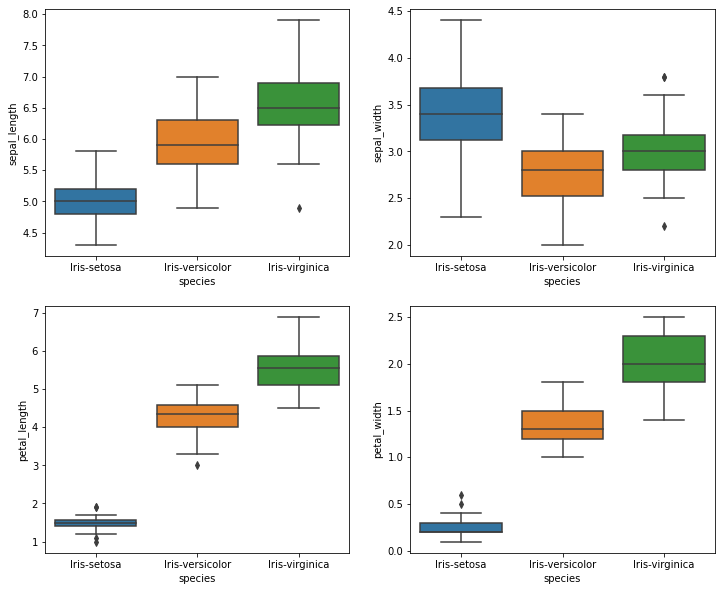

In [19]:
fig,ax = plt.subplots(2,2,figsize=(12,10))
sns.boxplot(data=iris,x='species',y='sepal_length',ax=ax[0][0])
sns.boxplot(data=iris,x='species',y='sepal_width',ax=ax[0][1])
sns.boxplot(data=iris,x='species',y='petal_length',ax=ax[1][0])
sns.boxplot(data=iris,x='species',y='petal_width',ax=ax[1][1])

### Outlier Treament

In [41]:
Q1 = iris['sepal_length'].quantile(0.3)
Q3 = iris['sepal_length'].quantile(0.75)
IQR = Q3-Q1

In [42]:
iris.shape 

(144, 5)

In [43]:
iris = iris[~((iris['sepal_length'] < (Q1 - 1.5*IQR)) | (iris['sepal_length'] > (Q3 + 1.5*IQR)))]

In [44]:
iris.shape 

(144, 5)

In [48]:
from scipy import stats
iris = pd.read_csv('iris.csv')
print(iris.shape)
iris = iris[np.abs(stats.zscore(iris[['sepal_length']]))<=2]
iris.shape

(150, 5)


(144, 5)

## Sampling Data

In [49]:
# Random sampling
sample_random = iris.sample(n=30)
print(sample_random.shape)

(30, 5)


In [50]:
sample_random["species"].value_counts()

Iris-versicolor    11
Iris-setosa        11
Iris-virginica      8
Name: species, dtype: int64